# Data Processing Notebook
 - This notebook is responsible for complete Data Processing like- Data cleaning, handling missing values, fixing data types, detecting and removing outliers, basic quality checks.
 - At last saving the cleaned dataset for futher modelling usage. 

## 1. Import Libraries

In [5]:
import os
import numpy as np
import pandas as pd
# warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

## 2. Loading Data

In [3]:
os.getcwd()

'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\src\\Data Processing'

In [ ]:
# pip install xlrd

In [3]:
path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\raw\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df = pd.read_excel(path)
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


## 3. Basic Checks

In [10]:
# Shape of data
print(f'Shape of the Dataset:{df.shape}\n')
print(f'Total Rows in the Dataset: {df.shape[0]}\n')
print(f'Total Columns in the Dataset: {df.shape[1]}\n')

Shape of the Dataset:(1200, 28)

Total Rows in the Dataset: 1200

Total Columns in the Dataset: 28



In [12]:
# Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [18]:
# Basic Statistics of dataset
print('Stats about numerical columns')
df.describe()

Stats about numerical columns


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [20]:
print('Stats about categorical columns')
df.describe(include='O')

Stats about categorical columns


,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [26]:
# Duplicates in the data
print('Total Duplicate rows in data:',df.duplicated().sum())

Total Duplicate rows in data: 0


In [46]:
# Features Names
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## 4. Target Column Distribution
 - Target Column is **Performance Rating**

In [36]:
print('Unique Categories in Target Column:')
print(df['PerformanceRating'].unique())

print('\n Value Count in each Category')
print(df['PerformanceRating'].value_counts())

print('\n Percentage Distribution among Target Categories')
print(df['PerformanceRating'].value_counts(normalize=True)*100)


Unique Categories in Target Column:
[3 4 2]

 Value Count in each Category
PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

 Percentage Distribution among Target Categories
PerformanceRating
3    72.833333
2    16.166667
4    11.000000
Name: proportion, dtype: float64


**Insight**
 - Target column is not balanced.
 - We will balance our target column further according to the need. 

## 5. Missing Values

In [42]:
# Null Values across columns
df.isna().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [5]:
# total null values
df.isnull().sum().sum()

0

## 6. Drop EmpNumber Column 
 - EmpNumber is not required in our model, so we drop it.

In [51]:
df.drop('EmpNumber', axis=1, inplace=True)

## 7. Save Cleaned Dataset

In [80]:
path = path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\raw\\Employees_cleaned_data.csv'
df.to_csv(path, index=False)

In [84]:
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [7]:
path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\processed\\Employees_cleaned_data.csv'
df = pd.read_csv(path)
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


## 8. Feature Engineering

### a. Outliers

In [9]:
# 1. Numerical Features
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Numerical Features:',num_feature)
print('Number of Numerical Features:',len(num_feature))

# 2. Categorical Features
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('\nCategorical Features:',cat_feature)
print('Number of Categorical Features:',len(cat_feature))

# 3. Discrete Features
discrete_feature = [feature for feature in num_feature if len(df[feature].unique())<=20]
print('\nDiscrete Features:',discrete_feature)
print('Number of Discrete Features:',len(discrete_feature))

# 4. Continuous Features
conti_feature = [feature for feature in num_feature if len(df[feature].unique())>20]
print('Continuous Features:',conti_feature)
print('Number of Continuous Features:',len(conti_feature))

Numerical Features: ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']
Number of Numerical Features: 19

Categorical Features: ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
Number of Categorical Features: 8

Discrete Features: ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPro

In [11]:
# columns for outlier detection
num_cols = [col for col in num_feature if df[col].nunique()>=15]
num_cols

['Age',
 'DistanceFromHome',
 'EmpHourlyRate',
 'EmpLastSalaryHikePercent',
 'TotalWorkExperienceInYears',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

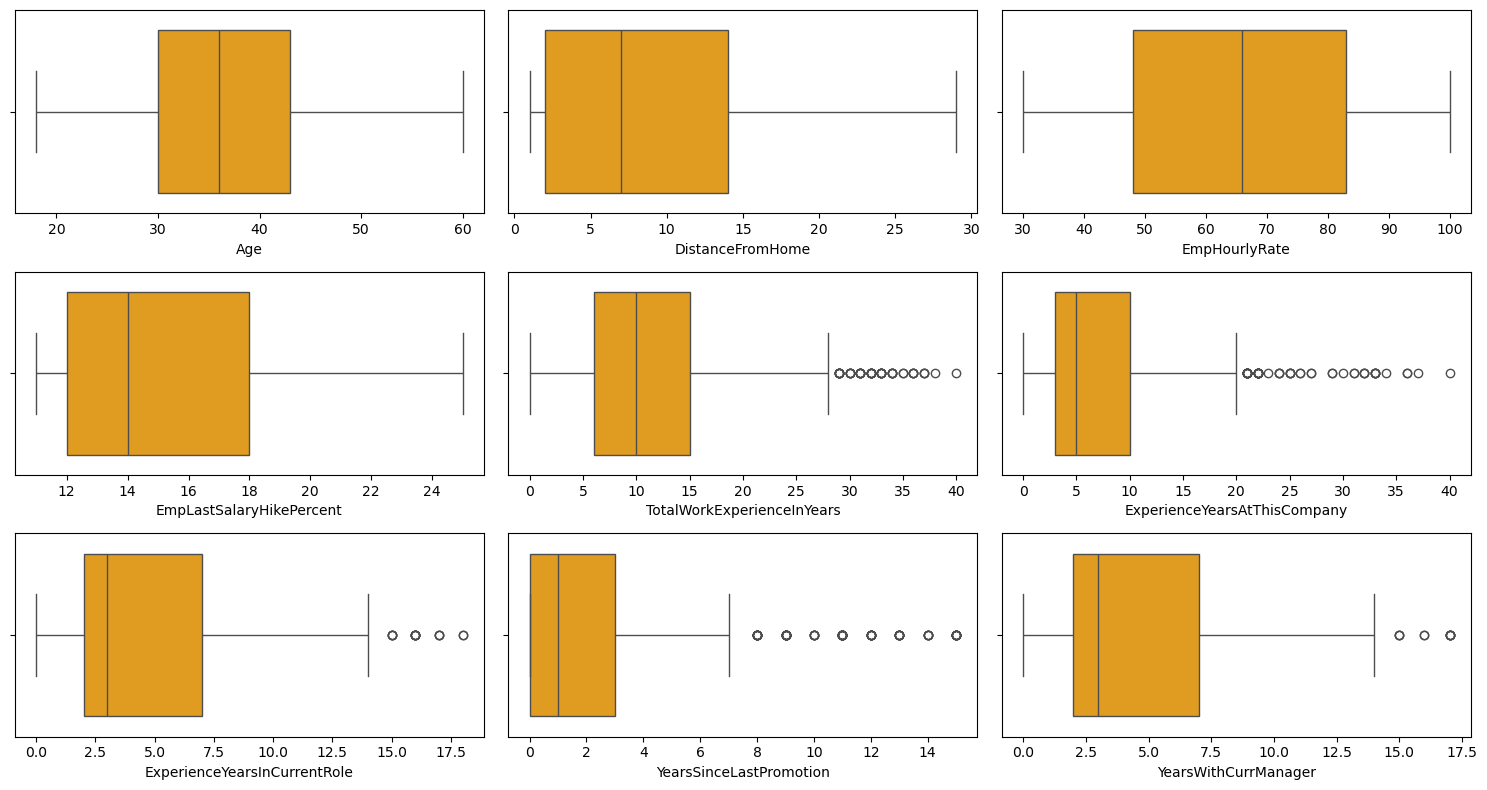

In [13]:
# Boxplots of numerical features.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
plotnumber=1
for col in num_cols:
    if plotnumber<=12:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df[col],color='orange')
        plt.xlabel(col)

        plotnumber+=1
plt.tight_layout()

In [15]:
for col in num_cols:
    print(f'\n{col}:')
    print('Skewness:',df[col].skew().round(2))
    print('Kurtosis:',df[col].kurtosis().round(2))


Age:
Skewness: 0.38
Kurtosis: -0.43

DistanceFromHome:
Skewness: 0.96
Kurtosis: -0.24

EmpHourlyRate:
Skewness: -0.04
Kurtosis: -1.19

EmpLastSalaryHikePercent:
Skewness: 0.81
Kurtosis: -0.3

TotalWorkExperienceInYears:
Skewness: 1.09
Kurtosis: 0.81

ExperienceYearsAtThisCompany:
Skewness: 1.79
Kurtosis: 4.06

ExperienceYearsInCurrentRole:
Skewness: 0.89
Kurtosis: 0.44

YearsSinceLastPromotion:
Skewness: 1.97
Kurtosis: 3.54

YearsWithCurrManager:
Skewness: 0.81
Kurtosis: 0.15


- Age and EmpHourlyRate are normally distributed so no need of outlier removal.
- we will check with otherrs how many outliers are there than process.

 **IQR Method**
 - Detecting and removing outlier.
   

In [13]:
# Total outliers in each num cols
num_col = ['DistanceFromHome','EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany',
           'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

def detect_outlier_iqr(df, columns):
    for col in num_col:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3-Q1
        upper_limit = Q3 + 1.5*iqr
        lower_limit = Q1 - 1.5*iqr
        outliers = df[(df[col]>upper_limit) | (df[col]<lower_limit)]
        print(f'{col}: {len(outliers)} outliers found')
    return

In [15]:
detect_outlier_iqr(df, num_col)

DistanceFromHome: 0 outliers found
EmpLastSalaryHikePercent: 0 outliers found
TotalWorkExperienceInYears: 51 outliers found
ExperienceYearsAtThisCompany: 56 outliers found
ExperienceYearsInCurrentRole: 16 outliers found
YearsSinceLastPromotion: 88 outliers found
YearsWithCurrManager: 11 outliers found


In [17]:
df1 = df.copy()

- First we will try to apply log transform in our columns, so we can avoid unnecessary data removal
- **LOG TRANSFORM**

In [19]:
skewed_col = ['TotalWorkExperienceInYears','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager']
for col in skewed_col:
    df1[col] = np.log1p(df1[col])  # log1p will transform to log values

# Again Check outliers with outlier function.
detect_outlier_iqr(df1,skewed_col)

DistanceFromHome: 0 outliers found
EmpLastSalaryHikePercent: 0 outliers found
TotalWorkExperienceInYears: 75 outliers found
ExperienceYearsAtThisCompany: 0 outliers found
ExperienceYearsInCurrentRole: 0 outliers found
YearsSinceLastPromotion: 0 outliers found
YearsWithCurrManager: 0 outliers found


- Our outliers are removed from all skewed columns except TotalWorkExperienceInYears column.
- we will revert it's log values and apply IQR removal method over it.

In [21]:
# Restoring original scale of TotalWorkExperienceInYears column.
# usimg expm1
df1['TotalWorkExperienceInYears'] = np.expm1(df1['TotalWorkExperienceInYears'])

# Checking again outlier in it
detect_outlier_iqr(df1, skewed_col)

DistanceFromHome: 0 outliers found
EmpLastSalaryHikePercent: 0 outliers found
TotalWorkExperienceInYears: 51 outliers found
ExperienceYearsAtThisCompany: 0 outliers found
ExperienceYearsInCurrentRole: 0 outliers found
YearsSinceLastPromotion: 0 outliers found
YearsWithCurrManager: 0 outliers found


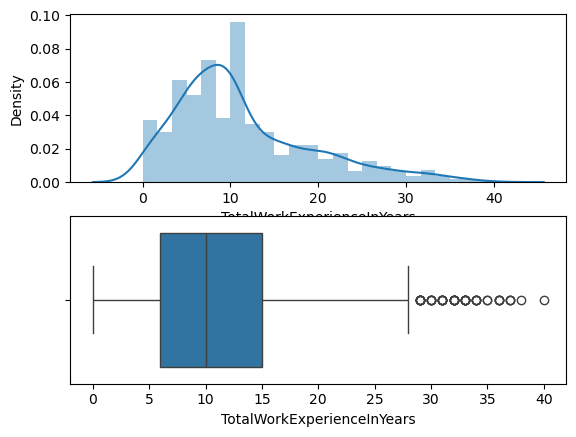

In [27]:
## Now removing outlier from TotalWorkExperienceInYears column using IQR method.
# plot for checking outliers.

def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(x=data[col],ax=ax2)

plot(df1,'TotalWorkExperienceInYears')

In [181]:
df1.shape

(1200, 27)

In [183]:
df1.PerformanceRating.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

- Identifying outliers length and their class before removing them as our data is small and imbalanced.

In [23]:
Q1 = df1['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df1['TotalWorkExperienceInYears'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [25]:
# all outliers in a variable
outlier_mask = (df1['TotalWorkExperienceInYears'] < lower) | (df1['TotalWorkExperienceInYears'] > upper)
outliers = df1[outlier_mask]

In [27]:
## Outliers Classes Count
outliers['PerformanceRating'].value_counts()

PerformanceRating
3    36
2     8
4     7
Name: count, dtype: int64

- Now we will trim the class 3 outliers as they are majority in overall data.
- And replace the class 2 and 4 outliers with median to preserve all possible balance in our dataset.

In [29]:
trim_rows = (outlier_mask) & (df1['PerformanceRating']==3)
preserve_rows = (outlier_mask) & (df1['PerformanceRating'].isin([2,4]))

In [31]:
# total outlier, trim and preserve data
print(outlier_mask.sum()) # total outliers
print(trim_rows.sum()) # total outliers to remove of class 3
print(preserve_rows.sum()) # total outliers to be imputed with median of class 2 and 4

51
36
15


In [33]:
df1 = df1[~trim_rows] # removing outliers

In [35]:
# Outlier Imputing with median
median_val = df1['TotalWorkExperienceInYears'].median()
df1.loc[preserve_rows,'TotalWorkExperienceInYears'] = median_val

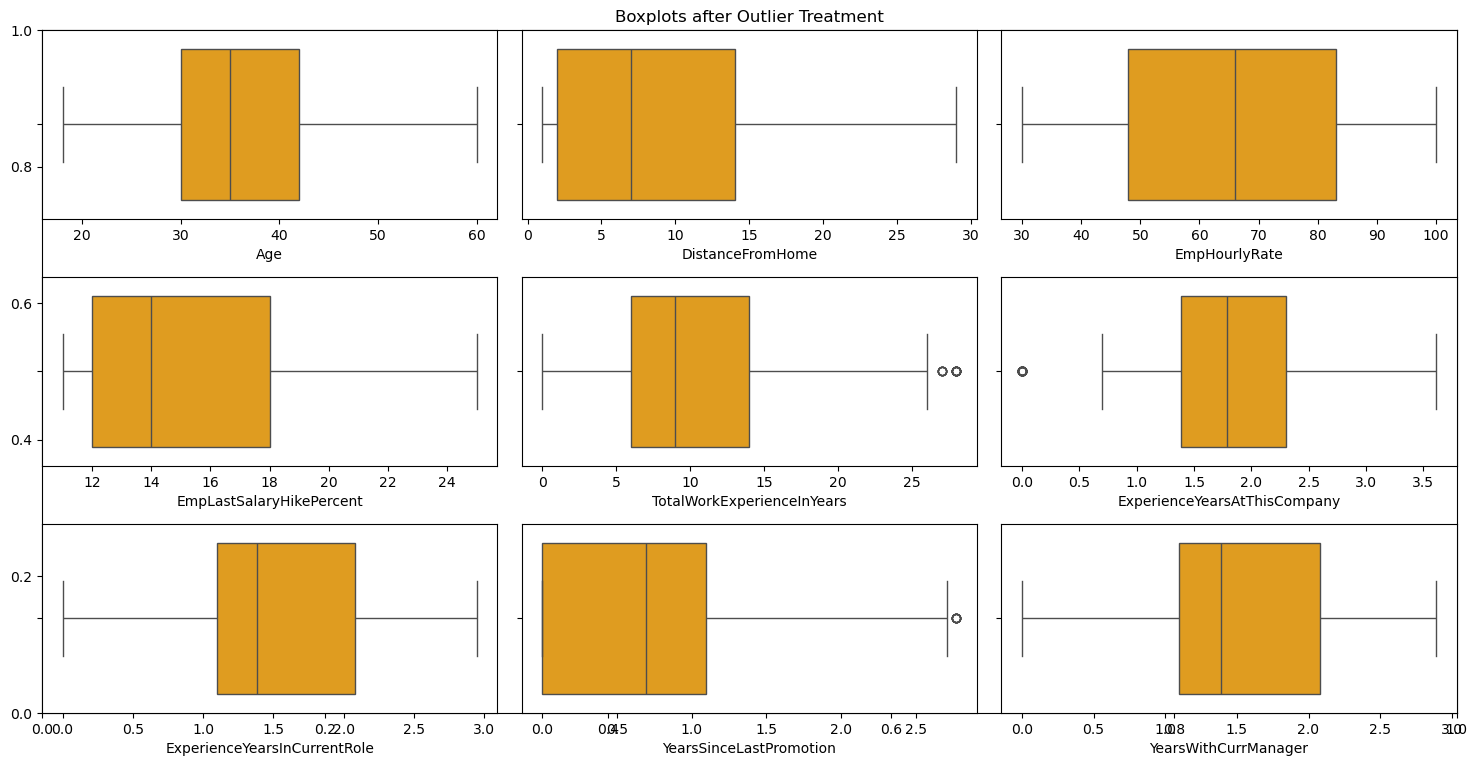

In [37]:
# Boxplots of numerical features. after outlier removal
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
plotnumber=1
plt.title('Boxplots after Outlier Treatment')
for col in num_cols:
    if plotnumber<=12:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=df1[col],color='orange')
        plt.xlabel(col)

        plotnumber+=1
plt.tight_layout()

In [45]:
df1.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10.0,2,2,2.397895,2.079442,0.000000,2.197225,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20.0,2,3,2.079442,2.079442,0.693147,2.079442,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20.0,2,3,2.944439,2.639057,0.693147,2.564949,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23.0,2,2,3.091042,1.945910,2.564949,1.945910,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10.0,1,3,1.098612,1.098612,1.098612,1.098612,No,3


### b. Train Test Split

In [39]:
X = df1.drop('PerformanceRating', axis=1)
y = df1['PerformanceRating']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('Train data size:',X_train.shape, y_train.shape)
print('Test data size:',X_test.shape, y_test.shape)

Train data size: (931, 26) (931,)
Test data size: (233, 26) (233,)


### c. Encoding of Categorical Columns & Scaling of true Numerical Columns

In [43]:
cat_feature

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [45]:
# Unique Values in cat_feature
for col in cat_feature:
    print(col,df[col].unique())

Gender ['Male' 'Female']
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus ['Single' 'Married' 'Divorced']
EmpDepartment ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
OverTime ['No' 'Yes']
Attrition ['No' 'Yes']


In [97]:
# numerical columns to be excluded from scaling
cols = ['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel',
       'EmpJobSatisfaction','EmpRelationshipSatisfaction','EmpWorkLifeBalance']
for col in cols:
    print(col,':',df1[col].unique())

EmpEducationLevel : [3 4 2 5 1]
EmpEnvironmentSatisfaction : [4 2 1 3]
EmpJobInvolvement : [3 2 1 4]
EmpJobLevel : [2 3 5 1 4]
EmpJobSatisfaction : [4 1 2 3]
EmpRelationshipSatisfaction : [4 3 2 1]
EmpWorkLifeBalance : [2 3 4 1]


- One Hot Encode in binary columns like Gender,Overtime,Attrition.(drop=if_binary)
- For rest columns we will use normal One Hot Encoder.(drop=first)
- Than remaining true numerical cols other than Categorical will be scaled using StandarScaler.
- Columns which are numerical but few unique cat like 5 will be excluded from scaling

In [47]:
# Column Transformer pipeline for Encoding and Scaling data
transformer = ColumnTransformer(transformers=[('binary_ohe',OneHotEncoder(drop='if_binary'),['Gender','OverTime','Attrition']),
                                             ('ohe',OneHotEncoder(drop='first'),['EducationBackground','MaritalStatus',
                                              'EmpDepartment','EmpJobRole','BusinessTravelFrequency']),
                                             ('scaler',StandardScaler(),X.columns.difference(['Gender', 'EducationBackground',
                                             'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
                                             'EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel',
       'EmpJobSatisfaction','EmpRelationshipSatisfaction','EmpWorkLifeBalance','OverTime', 'Attrition']).tolist())
                                             ], remainder='passthrough')

In [49]:
# Transforming the features.
# train data
X_train_trans = transformer.fit_transform(X_train)
# test data
X_test_trans = transformer.transform(X_test)

In [51]:
X_train_trans.shape, X_test_trans.shape

((931, 53), (233, 53))

## 9. Convert Transformed Features to DataFrame with Column Names

In [114]:
columns = transformer.get_feature_names_out()
# X_train_trans to df
X_train_df = pd.DataFrame(X_train_trans, columns=columns)
# X_test_trans to df
X_test_df = pd.DataFrame(X_test_trans, columns=columns)

# y_train to df
y_train_df = pd.DataFrame(y_train, columns=['PerformanceRating'])
# y_test to df
y_test_df = pd.DataFrame(y_test, columns=['PerformanceRating'])

In [120]:
X_train_df.head()

,binary_ohe__Gender_Male,binary_ohe__OverTime_Yes,binary_ohe__Attrition_Yes,ohe__EducationBackground_Life Sciences,ohe__EducationBackground_Marketing,ohe__EducationBackground_Medical,ohe__EducationBackground_Other,ohe__EducationBackground_Technical Degree,ohe__MaritalStatus_Married,ohe__MaritalStatus_Single,...,scaler__TrainingTimesLastYear,scaler__YearsSinceLastPromotion,scaler__YearsWithCurrManager,remainder__EmpEducationLevel,remainder__EmpEnvironmentSatisfaction,remainder__EmpJobInvolvement,remainder__EmpJobLevel,remainder__EmpJobSatisfaction,remainder__EmpRelationshipSatisfaction,remainder__EmpWorkLifeBalance
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.953866,-0.976564,-1.661542,2.0,4.0,4.0,1.0,2.0,3.0,2.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.234820,-0.106249,0.949911,4.0,4.0,3.0,2.0,4.0,1.0,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.156694,-0.976564,-1.661542,4.0,3.0,3.0,2.0,2.0,4.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,-0.640477,-0.976564,0.079427,2.0,4.0,2.0,2.0,2.0,1.0,3.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.156694,-0.976564,1.349839,4.0,1.0,2.0,4.0,2.0,3.0,3.0


In [124]:
y_test_df.tail()

,PerformanceRating
938,3
142,3
56,3
936,2
367,3


## 10. Saving Final Encoded Train/Test DataFrame for Modelling

In [141]:
# Saving train files in Train_Data folder
X_train_path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\processed\\Train_Data\\X_train.csv'
y_train_path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\processed\\Train_Data\\y_train.csv'

X_train_df.to_csv(X_train_path, index=False)
y_train_df.to_csv(y_train_path, index=False)

In [143]:
# Saving test files in Test_Data folder
X_test_path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\processed\\Test_Data\\X_test.csv'
y_test_path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\processed\\Test_Data\\y_test.csv'

X_test_df.to_csv(X_test_path, index=False)
y_test_df.to_csv(y_test_path, index=False)

## Saving Column transformer

In [56]:
import joblib
joblib.dump(transformer, 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\artifacts\\preprocessor.pkl')  

['D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\artifacts\\preprocessor.pkl']